## Ejerccio de Tarea 01
Para los datos de la [Liga Nacional de Fútbol](https://github.com/HaydeePeruyero/MultivariateStatisticalAnalysis/blob/main/data/Liga_nacional_de_futbol.csv)

**a**. Ajustar un modelo de regresión lineal múltiple que relacione la cantidad de juegos ganados con las yardas por aire del equipo ($x_2$), el porcentaje de jugadas por tierra ($x_7$) y las yardas por tierra del contrario ($x_8$).  

**b**. Formar la tabla de análisis de varianza y probar la significancia de la regresión.  

**c**. Calcular el estadístico *t* para probar las hipótesis $H_0 : \beta_2 = 0$, $H_0 : \beta_7 = 0$ y $H_0 : \beta_8 = 0$. ¿Qué conclusiones se pueden sacar acerca del papel de las variables $x_2$, $x_7$ y $x_8$ en el modelo?  

**d**. Calcular $R^2$ y $R^2_{adj}$ para este modelo.  

**e**. Trazar una gráfica de probabilidad normal de los residuales. ¿Parece haber algún problema con la hipótesis de normalidad?  

**f**. Trazar e interpretar una gráfica de los residuales en función de la respuesta predicha.  

**g**. Trazar las gráficas de los residuales en función de cada una de las variables regresoras. ¿Implican esas gráficas que se especificó en forma correcta el regresor?  

**h**. Calcular un intervalo de confianza de $95\%$ para $\beta_7$ y un intervalo de confianza de $95\%$ para la cantidad media de juegos ganados por un equipo cuando $x_2 = 2300$, $x_7 = 56$ y $x_8 = 2100$.  

**i**. Ajustar un modelo a esos datos, usando solo $x_7$ y $x_8$ como regresores y probar la significancia de la regresión.  

**j**. Calcular $R^2$ y $R^2_{adj}$. Compararlos con los resultados del modelo anterior.  

**k**. Calcular un intervalo de confianza de $95\%$ para $\beta_7$. También, un intervalo de confianza de $95\%$ para la cantidad media de juegos ganados por un equipo cuando $x_7 = 56$ y $x_8 = 2100$. Comparar las longitudes de esos intervalos de confianza con las longitudes de los correspondientes al modelo anterior.  

**l**. ¿Qué conclusiones se pueden sacar de este problema, acerca de las consecuencias de omitir un regresor importante de un modelo?

## 0. Importar 

### 0.1. Importar Librerías

In [14]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm
import statsmodels.formula.api as smf

from scipy import stats

### 0.2. Cargar Datos

In [15]:
DatasetFutbol = pd.read_csv(
    './Liga_nacional_de_futbol.csv',
)

TargetLabel , *FeatureLabels = DatasetFutbol.columns

DatasetFutbol.head()

,y,x1,x2,x3,x4,x5,x6,x7,x8,x9
0,10,2113,1985,38.9,64.7,4,868,59.7,2205,1917
1,11,2003,2855,38.8,61.3,3,615,55.0,2096,1575
2,11,2957,1737,40.1,60.0,14,914,65.6,1847,2175
3,13,2285,2905,41.6,45.3,-4,957,61.4,1903,2476
4,10,2971,1666,39.2,53.8,15,836,66.1,1457,1866


## **a**. Modelo de Regresión

Por medio del plot generado, se puede apreciar que algunos de los atributos (varaibles de regresión) consideradas capturan una tendendecia o relación con la variable de respuesta. Esta variables son $x_7$ (porcentaje de jugadas por tierra) y $x_8$ (yardas por tierra del contrario), mientras que la variable $x_2$ (yardas por aire del equipo) que tiene un comportamiento más aleatorio (posible no estén correlacionadas).

In [ ]:
# Ajuste de Modelo usando Funciones de Python 

FeaturesModel = ['x2','x7','x8']

LinearModel = smf.ols(
    f"{TargetLabel} ~ " + ' + '.join(FeaturesModel),
    data = DatasetFutbol,
).fit()

In [17]:
# Ajuste de Modelo de forma Manual

SizeN = DatasetFutbol.shape[0]

DataMatrixX = np.concat(
        [
            np.ones((SizeN,1)),
            DatasetFutbol[FeaturesModel].to_numpy()
        ],
        axis=1,
    )
RealValuesY = DatasetFutbol[[TargetLabel]].to_numpy()

EstimateBetas = np.linalg.inv(DataMatrixX.T@DataMatrixX) @ DataMatrixX.T @ RealValuesY

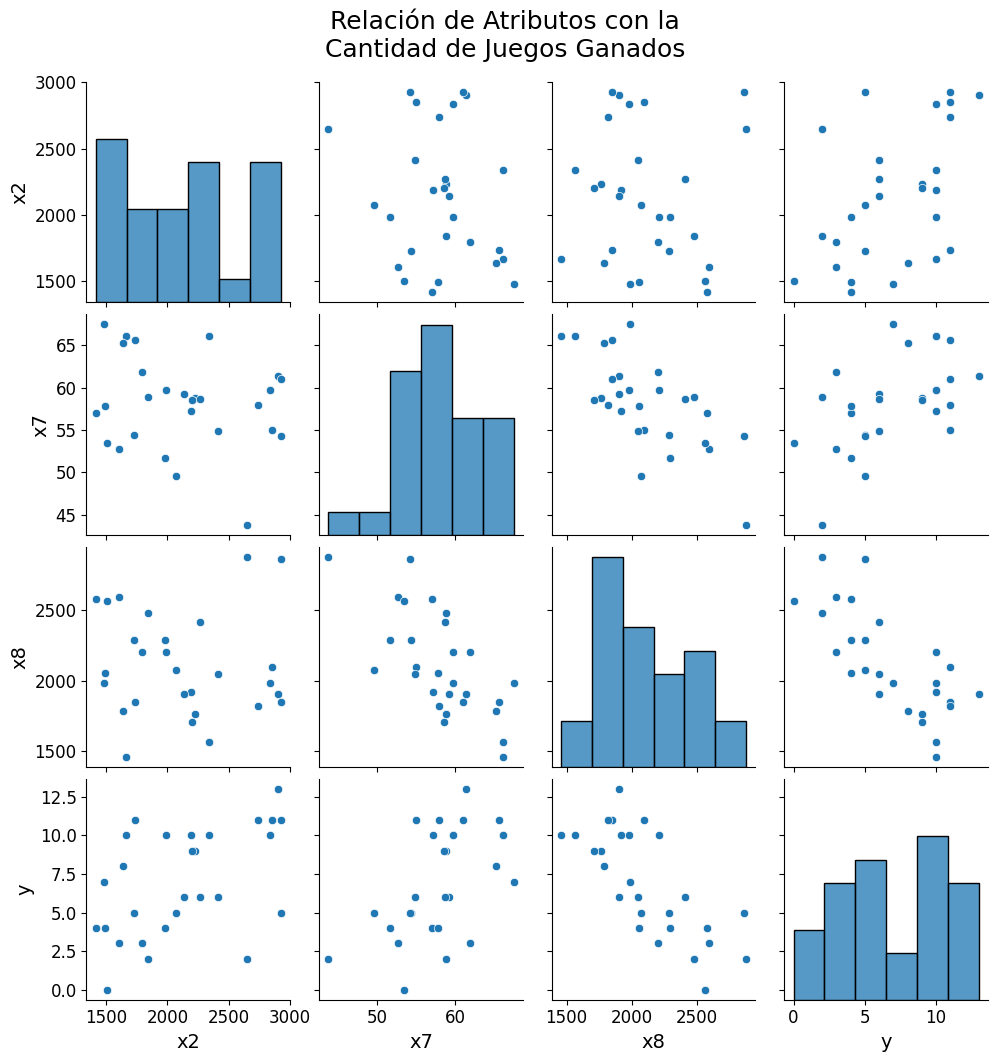

In [35]:
plot = sns.pairplot(
    DatasetFutbol[[*FeaturesModel,TargetLabel]],
)

plot.figure.suptitle(
    'Relación de Atributos con la\nCantidad de Juegos Ganados', 
    fontsize = 18,
    y = 1.05,
)

for ax in plot.axes.flat:
    ax.set_xlabel(
        ax.get_xlabel(),
        fontsize=14,
    )
    ax.set_ylabel(
        ax.get_ylabel(),
        fontsize=14,
    )
    
    ax.tick_params(
        axis = 'both',
        which = 'major',
        labelsize = 12,
    )

## **b**. Tabla de Análisis de Varianza

Usando los valores que se encuentran en la columna de `Cuadrados Medios`, permiten decir el modelo se ajusta adecuadamente, debido a que el valor en los Cuadrados Medios Residuales es un valor bajo. Aplicando la prueba de la significancia de la regresión, se tiene que el estadistico $F_0$ es mayor que a $F_1$ por lo que la cantidad de juegos ganados depende linealmente de las variables de estudio.

In [ ]:
def ANOVATable(
        LinearModel,
    ) -> pd.DataFrame:
    """
    Función para construir la tabla de ANOVA 
    en base a un modelo de Regresión Lineal, 
    se extraen los valores de interés y son 
    reacomodados en un formato tabular.
    """
    
    ColumnsANOVA = [
        'Fuente Variación',
        'Suma de Cuadrados',
        'Grados de Libertad',
        'Cuadrados Medios',
        'F_0',
    ]
    Table = pd.DataFrame(columns=ColumnsANOVA)
    Table['Fuente Variación'] = ['Regresión','Residuales','Total']

    MeanSquares_Reg = LinearModel.mse_model
    MeanSquares_Res = LinearModel.mse_resid
    MeanSquares_Tot = LinearModel.mse_total
    Table['Cuadrados Medios'] = [MeanSquares_Reg,MeanSquares_Res,MeanSquares_Tot]

    DegreeFreedom_Reg = LinearModel.df_model
    DegreeFreedom_Res = LinearModel.df_resid
    DegreeFreedom_Tot = DegreeFreedom_Reg + DegreeFreedom_Res
    Table['Grados de Libertad'] = [DegreeFreedom_Reg,DegreeFreedom_Res,DegreeFreedom_Tot]

    Table['Suma de Cuadrados'] = Table['Cuadrados Medios']*Table['Grados de Libertad']

    Table['F_0'] = [LinearModel.fvalue,np.nan,np.nan]

    return Table.set_index('Fuente Variación')

In [ ]:
def ANOVATable_Manual(
        DataMatrixX: np.ndarray,
        RealValuesY: np.ndarray,
        EstimateBetas: np.ndarray,
    ) -> pd.DataFrame:
    """
    Función para construir la tabla de ANOVA 
    en base a las observaciones (`DataMatrixX` y 
    `RealValuesY`) y los coeficientes de regresión 
    (`EstimateBetas`), se hacen uso de las formulas 
    matriciales para determinar los diferentes 
    valores de la tabla.
    """

    ColumnsANOVA = [
        'Fuente Variación',
        'Suma de Cuadrados',
        'Grados de Libertad',
        'Cuadrados Medios',
        'F_0',
    ]
    Table = pd.DataFrame(columns=ColumnsANOVA)
    Table['Fuente Variación'] = ['Regresión','Residuales','Total']

    SizeN = DataMatrixX.shape[0]
    SumSquares_Tot = (RealValuesY.T@RealValuesY - np.sum(RealValuesY)**2/SizeN)[0,0]
    SumSquares_Reg = (EstimateBetas.T@DataMatrixX.T@RealValuesY - np.sum(RealValuesY)**2/SizeN)[0,0]
    SumSquares_Res = SumSquares_Tot - SumSquares_Reg
    Table['Suma de Cuadrados'] = [SumSquares_Reg,SumSquares_Res,SumSquares_Tot]

    DegreeFreedom_Reg = len(EstimateBetas) - 1
    DegreeFreedom_Res = SizeN - len(EstimateBetas)
    DegreeFreedom_Tot = DegreeFreedom_Reg + DegreeFreedom_Res
    Table['Grados de Libertad'] = [DegreeFreedom_Reg,DegreeFreedom_Res,DegreeFreedom_Tot]

    Table['Cuadrados Medios'] = Table['Suma de Cuadrados']/Table['Grados de Libertad']

    Table['F_0'] = [Table['Cuadrados Medios'].iloc[0]/Table['Cuadrados Medios'].iloc[1],np.nan,np.nan]

    return Table.set_index('Fuente Variación')

In [36]:
ANOVA = ANOVATable(
    LinearModel,
)

ANOVA

,Suma de Cuadrados,Grados de Libertad,Cuadrados Medios,F_0
Fuente Variación,,,,
Regresión,257.094282,3.0,85.698094,29.43687
Residuales,69.870004,24.0,2.911250,NaN
Total,326.964286,27.0,12.109788,NaN


In [41]:
ANOVA_Manual = ANOVATable_Manual(
    DataMatrixX,
    RealValuesY,
    EstimateBetas,
)

ANOVA_Manual

,Suma de Cuadrados,Grados de Libertad,Cuadrados Medios,F_0
Fuente Variación,,,,
Regresión,257.094282,3,85.698094,29.43687
Residuales,69.870004,24,2.911250,NaN
Total,326.964286,27,12.109788,NaN


In [56]:
# Calculo del valor estadístico F_1

LevelSignificance = 0.05
F_1 = stats.f.ppf(1-LevelSignificance,*ANOVA['Grados de Libertad'].iloc[:2])

print(f'F_1 :: {F_1}')

F_1 :: 3.0087865704473615


## **c**. Prueba sobre los Coeficientes Individuales de Regresión

Las tres variables tiene un valor en sus respectivos estadísticos $t_0$ mayor, en valor absoluto, a $t_1$, por lo que las tres variables tienen una influencia sobre la variable de respuesta. Aunque la variable $x_7$ tenga una manor influencia o impacto debido a que valor se aproxima o se parece a $t_1$.

In [ ]:
def TestIndividualCoefficients(
        LinearModel,
        Dataset: pd.DataFrame,
        FeaturesModel: list[str],
        LevelSignificance: float = 0.05,
    ):
    """
    Función para calcular el estadístico t_0 
    para la prueba sobre los coeficientes 
    individuales de regresión en un Modelo 
    Lineal; también se muestra el valor de 
    t_1 (para la prueba alternativa) con 
    un cierto nivel de significancia.
    """

    CovarianceEstimateBetas = CalculatedCovarianceEstimateBetas(LinearModel,Dataset,FeaturesModel)

    t_Value_1 = stats.t.ppf(1-LevelSignificance/2,LinearModel.df_resid)
    print(f't_1 :: {t_Value_1}')
    print(f'\nt_0 Values')
    for index_feature , (feature,beta_value) in enumerate(LinearModel.params[1:].items(),1):
        tValue_0 = beta_value / np.sqrt(CovarianceEstimateBetas[index_feature,index_feature])
        print(f'{feature} :: {tValue_0}')

def CalculatedCovarianceEstimateBetas(
        LinearModel,
        Dataset: pd.DataFrame,
        FeaturesModel: list[str],
    ) -> np.ndarray:
    """
    Función para calcular la matriz 
    de covarianza de los parámetros 
    o coeficientes de regresión en 
    base a las observaciones y modelo 
    lineal.
    """

    SizeN = Dataset.shape[0]
    DataMatrix = np.concat(
        [
            np.ones((SizeN,1)),
            Dataset[FeaturesModel].to_numpy()
        ],
        axis=1,
    )

    EstimateSquareSigma = LinearModel.mse_resid # == ANOVA.loc['Residuales','Cuadrados Medios']
    return EstimateSquareSigma*np.linalg.inv(DataMatrix.T@DataMatrix)

In [ ]:
# Calculo de valores t_0 y t_1

LevelSignificance = 0.05

TestIndividualCoefficients(
    LinearModel,
    DatasetFutbol,
    FeaturesModel,
    LevelSignificance,
)

t_1 :: 2.0638985616280205

t_0 Values
x2 :: 5.177090239985967
x7 :: 2.198261682781837
x8 :: -3.7710364517268267


## **d**. Métricas del Modelo

Las métricas del modelo son bajas, esto representa que no se está modelando adecuadamente la variable de respuesta. Al observar el plot, se puede ver que existen observaciones que no se ajustan al modelo propuesto, teniendo que empeore el rendimiento del propio modelo auqnue en algunas instancias tenga un comportamiento esperado.

In [ ]:
# Scores usando el Modelo

print(f'R^2 :: {LinearModel.rsquared}')
print(f'R^2 Adjustada:: {LinearModel.rsquared_adj}')

R^2 :: 0.7863069233109538
R^2 Adjustada:: 0.759595288724823


In [77]:
# Scores usando Operaciones Manuales

RSquared = float.__truediv__(*ANOVA_Manual['Suma de Cuadrados'][['Regresión','Total']])
RSquared_Adj = 1-((1-RSquared)*ANOVA_Manual.loc['Total','Grados de Libertad'])/(ANOVA_Manual.loc['Residuales','Grados de Libertad'])

print(f'R^2 :: {RSquared}')
print(f'R^2 Adjustada:: {RSquared_Adj}')

R^2 :: 0.7863069233107012
R^2 Adjustada:: 0.7595952887245389


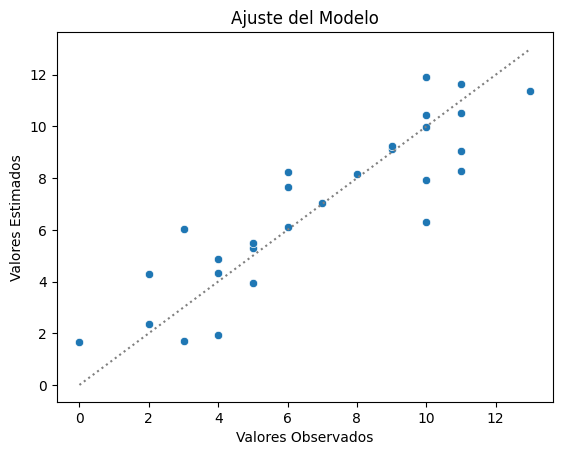

In [80]:
# Plot de los valores esperados (observados) y estimados

fig , axes = plt.subplots()

EstimateValuesY = DataMatrixX@EstimateBetas
sns.scatterplot(
    x=RealValuesY[:,0],
    y=EstimateValuesY[:,0],
    ax=axes,
)

IdentityValues = np.linspace(min(RealValuesY),max(RealValuesY))
sns.lineplot(
    x=IdentityValues[:,0],
    y=IdentityValues[:,0],
    color='gray',
    linestyle=':',
)

axes.set_title('Ajuste del Modelo')
axes.set_xlabel('Valores Observados')
axes.set_ylabel('Valores Estimados');

## **e**. Gráfica de Probabilidad Normal de los Residuales

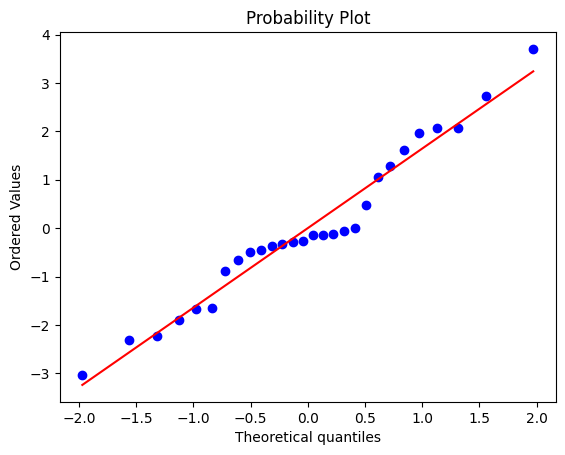

In [11]:
fig , axes = plt.subplots()
_ = stats.probplot(
    LinearModel.resid,
    dist = 'norm',
    plot = axes,
)

## **f**. Gráfica de los Residuales en Función de la Respuesta Predicha

<Axes: xlabel='y', ylabel='None'>

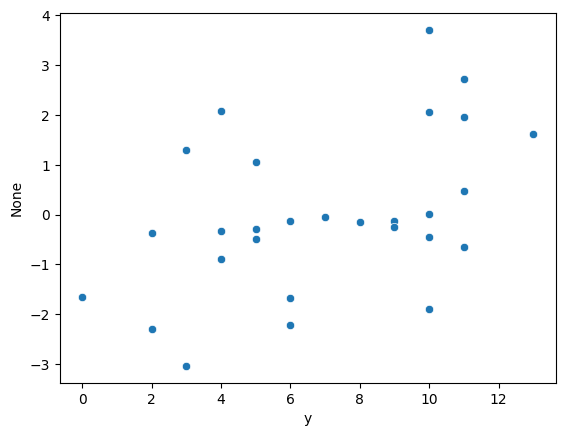

In [12]:
sns.scatterplot(
    x = DatasetFutbol[TargetLabel],
    y = LinearModel.resid,
)

## **g**. Gráficas de los Residuales en Función de las Variables Regresoras

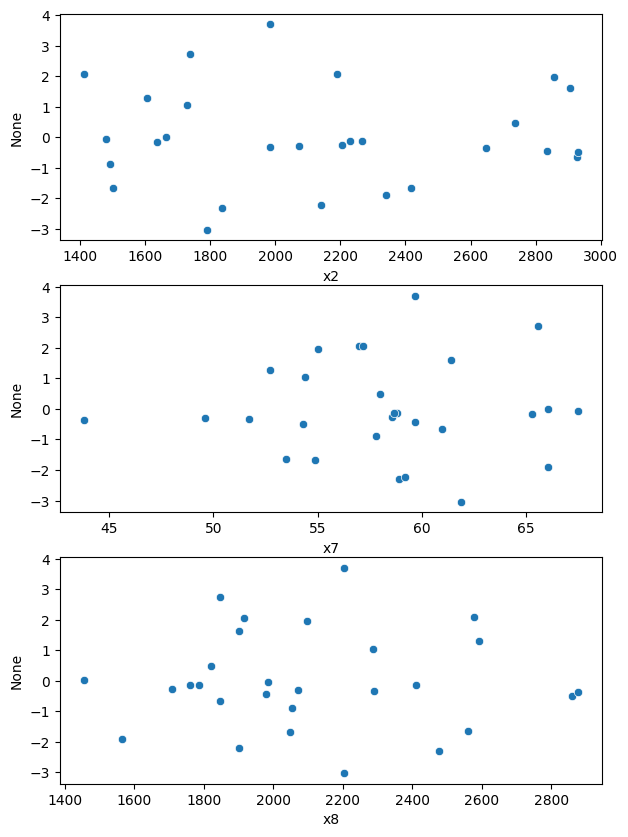

In [13]:
fig , axes = plt.subplots(
    3,
    figsize = (7,10)
)

for feature , ax in zip(FeaturesModel,axes.ravel()):
    sns.scatterplot(
        x = DatasetFutbol[feature],
        y = LinearModel.resid,
        ax = ax,
    )